# Preprocessing and Modeling

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [130]:
df_train = pd.read_csv('../data/train_clean.csv')
df_train.set_index('Id', inplace=True)

In [131]:
# check the shape of df_train
df_train.shape

(2049, 74)

In [132]:
df_train.head()

,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,...,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,mo sold,yr sold,sale type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,Y,0,44,0,0,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,Y,0,74,0,0,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,52,0,0,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,...,Y,100,0,0,0,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,...,N,0,59,0,0,0,3,2010,WD,138500


## Create Polynomial Features: Train

Create polynomial features for the following variables: overall qual, gr living area, garage area, overall cond, kitchen abvgr.

In [133]:
# Create a new dataframe to house the variables that will be manipulated
df_train2 = df_train[['overall qual', 'overall cond', 'gr liv area', 'garage area', 'kitchen abvgr']]

In [134]:
df_train2.head()

,overall qual,overall cond,gr liv area,garage area,kitchen abvgr
Id,,,,,
109,6,8,1479,475.0,1
544,7,5,2122,559.0,1
153,5,7,1057,246.0,1
318,5,5,1444,400.0,1
255,6,8,1445,484.0,1


In [135]:
# Instantiate PolynomialFeatures object to create all two-way terms.
polynomial_features = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [136]:
# Fit and transform the train data.
poly_train = polynomial_features.fit_transform(df_train2)

In [137]:
poly_train.shape

(2049, 20)

In [138]:
# Transform into a dataframe
poly_train = pd.DataFrame(poly_train, columns = polynomial_features.get_feature_names(df_train2.columns), index=df_train2.index)
poly_train.head()

,overall qual,overall cond,gr liv area,garage area,kitchen abvgr,overall qual^2,overall qual overall cond,overall qual gr liv area,overall qual garage area,overall qual kitchen abvgr,overall cond^2,overall cond gr liv area,overall cond garage area,overall cond kitchen abvgr,gr liv area^2,gr liv area garage area,gr liv area kitchen abvgr,garage area^2,garage area kitchen abvgr,kitchen abvgr^2
Id,,,,,,,,,,,,,,,,,,,,
109,6.0,8.0,1479.0,475.0,1.0,36.0,48.0,8874.0,2850.0,6.0,64.0,11832.0,3800.0,8.0,2187441.0,702525.0,1479.0,225625.0,475.0,1.0
544,7.0,5.0,2122.0,559.0,1.0,49.0,35.0,14854.0,3913.0,7.0,25.0,10610.0,2795.0,5.0,4502884.0,1186198.0,2122.0,312481.0,559.0,1.0
153,5.0,7.0,1057.0,246.0,1.0,25.0,35.0,5285.0,1230.0,5.0,49.0,7399.0,1722.0,7.0,1117249.0,260022.0,1057.0,60516.0,246.0,1.0
318,5.0,5.0,1444.0,400.0,1.0,25.0,25.0,7220.0,2000.0,5.0,25.0,7220.0,2000.0,5.0,2085136.0,577600.0,1444.0,160000.0,400.0,1.0
255,6.0,8.0,1445.0,484.0,1.0,36.0,48.0,8670.0,2904.0,6.0,64.0,11560.0,3872.0,8.0,2088025.0,699380.0,1445.0,234256.0,484.0,1.0


In [139]:
# merge the sales column into the dataframe on ID
# this way correlation can be checked
poly_train2 = pd.merge(poly_train, df_train['saleprice'],
                  left_on='Id',
                  right_on='Id')

In [140]:
# Check merge is correct
poly_train2.head()

,overall qual,overall cond,gr liv area,garage area,kitchen abvgr,overall qual^2,overall qual overall cond,overall qual gr liv area,overall qual garage area,overall qual kitchen abvgr,...,overall cond gr liv area,overall cond garage area,overall cond kitchen abvgr,gr liv area^2,gr liv area garage area,gr liv area kitchen abvgr,garage area^2,garage area kitchen abvgr,kitchen abvgr^2,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,6.0,8.0,1479.0,475.0,1.0,36.0,48.0,8874.0,2850.0,6.0,...,11832.0,3800.0,8.0,2187441.0,702525.0,1479.0,225625.0,475.0,1.0,130500
544,7.0,5.0,2122.0,559.0,1.0,49.0,35.0,14854.0,3913.0,7.0,...,10610.0,2795.0,5.0,4502884.0,1186198.0,2122.0,312481.0,559.0,1.0,220000
153,5.0,7.0,1057.0,246.0,1.0,25.0,35.0,5285.0,1230.0,5.0,...,7399.0,1722.0,7.0,1117249.0,260022.0,1057.0,60516.0,246.0,1.0,109000
318,5.0,5.0,1444.0,400.0,1.0,25.0,25.0,7220.0,2000.0,5.0,...,7220.0,2000.0,5.0,2085136.0,577600.0,1444.0,160000.0,400.0,1.0,174000
255,6.0,8.0,1445.0,484.0,1.0,36.0,48.0,8670.0,2904.0,6.0,...,11560.0,3872.0,8.0,2088025.0,699380.0,1445.0,234256.0,484.0,1.0,138500


### Explore new correlations

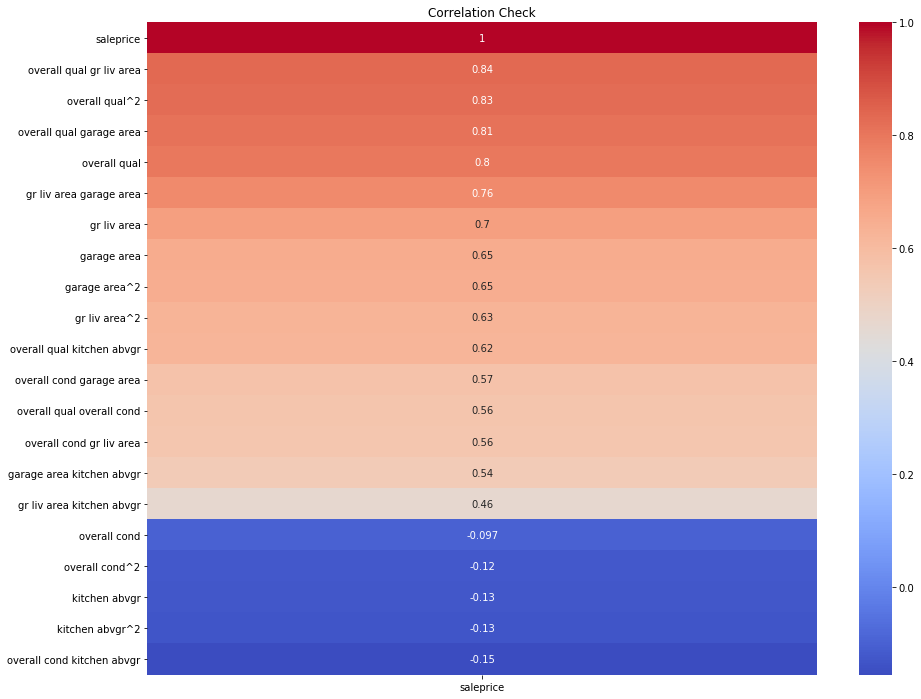

In [141]:
# Which variables have the strongest correlations with saleprice?

fig, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(poly_train2.corr()[['saleprice']].sort_values(by=['saleprice'],
                                                          ascending=False),
            annot=True, 
            ax=ax, 
            cmap='coolwarm')

# Adjust for cut off edges
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Check');

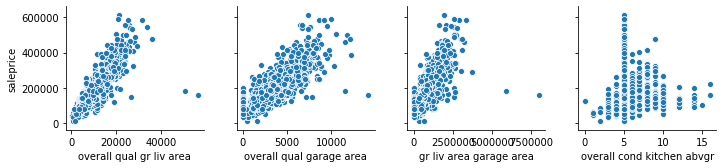

In [159]:
sns.pairplot(data=poly_train2,
                  y_vars=['saleprice'],
                  x_vars=['overall qual gr liv area', 
                          'overall qual garage area', 
                         'gr liv area garage area',
                         'overall cond kitchen abvgr']);

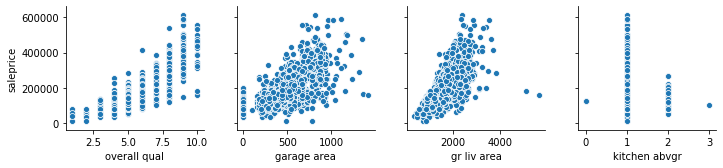

In [160]:
sns.pairplot(data=poly_train2,
                  y_vars=['saleprice'],
                  x_vars=['overall qual', 
                          'garage area', 
                         'gr liv area',
                         'kitchen abvgr']);

### Combine with training dataset

In [143]:
# create a dataframe with only the high correlation features
high_corr_polys = poly_train2.loc[:, poly_train2.corr()['saleprice'] > 0.65]

In [144]:
# Drop the columns that already exist in train
high_corr_polys.drop(columns=['saleprice', 'overall qual', 'gr liv area'], inplace=True)

/Users/jessicaertel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [145]:
high_corr_polys.head()

,garage area,overall qual^2,overall qual gr liv area,overall qual garage area,gr liv area garage area
Id,,,,,
109,475.0,36.0,8874.0,2850.0,702525.0
544,559.0,49.0,14854.0,3913.0,1186198.0
153,246.0,25.0,5285.0,1230.0,260022.0
318,400.0,25.0,7220.0,2000.0,577600.0
255,484.0,36.0,8670.0,2904.0,699380.0


In [146]:
# Merge high correlation variables and the original dataframe
df_train = pd.merge(df_train, high_corr_polys, left_on='Id', right_on='Id')

In [147]:
df_train.head()

,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,...,screen porch,mo sold,yr sold,sale type,saleprice,garage area_y,overall qual^2,overall qual gr liv area,overall qual garage area,gr liv area garage area
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,3,2010,WD,130500,475.0,36.0,8874.0,2850.0,702525.0
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,4,2009,WD,220000,559.0,49.0,14854.0,3913.0,1186198.0
153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,1,2010,WD,109000,246.0,25.0,5285.0,1230.0,260022.0
318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,174000,400.0,25.0,7220.0,2000.0,577600.0
255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,3,2010,WD,138500,484.0,36.0,8670.0,2904.0,699380.0


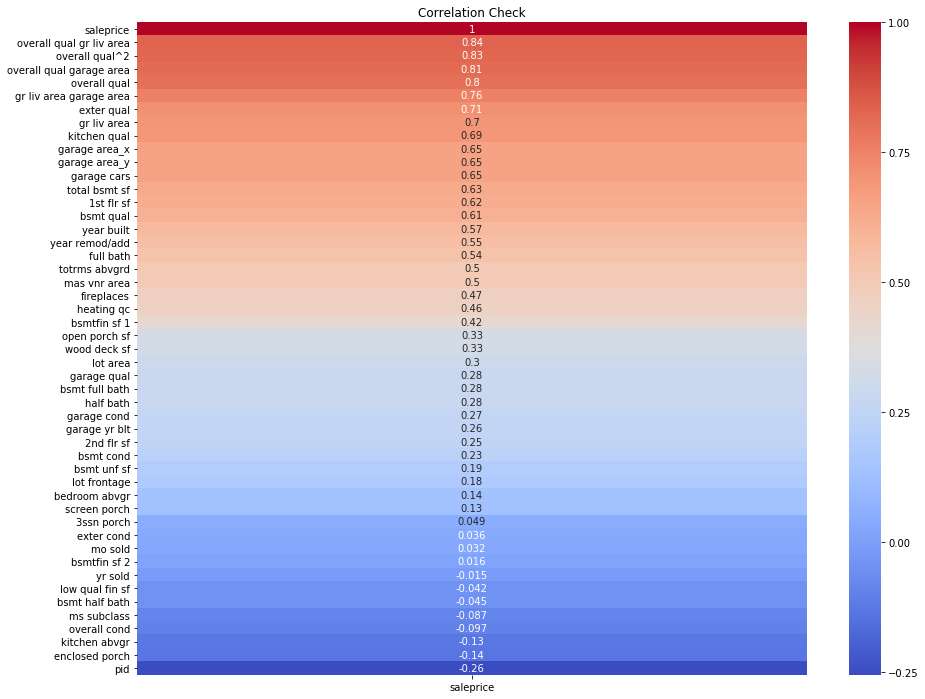

In [148]:
# Which variables have the strongest correlations with saleprice?

fig, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(df_train.corr()[['saleprice']].sort_values(by=['saleprice'],
                                                          ascending=False),
            annot=True, 
            ax=ax, 
            cmap='coolwarm')

# Adjust for cut off edges
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Check');

### Export to csv

In [149]:
# save to train.csv
df_train.to_csv('../data/train_clean.csv')

## Create Polynomial Features: Test

In [150]:
#Import the test dataset to add new features
df_test = pd.read_csv('../data/test_clean.csv')
df_test.set_index('Id', inplace=True)

In [151]:
#check first five rows
df_test.head()

,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,...,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,mo sold,yr sold,sale type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,...,1,Y,0,60,112,0,0,4,2006,WD
2718,905108090,90,RL,0.0,9662,Pave,IR1,Lvl,AllPub,Inside,...,3,Y,170,0,0,0,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,...,3,Y,100,24,0,0,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,...,3,N,0,0,184,0,0,7,2007,WD
625,535105100,20,RL,0.0,9500,Pave,IR1,Lvl,AllPub,Inside,...,3,Y,0,76,0,0,185,7,2009,WD


In [152]:
# Create a new dataframe to house the variables that will be manipulated
df_test2 = df_test[['overall qual', 'overall cond', 'gr liv area', 'garage area', 'kitchen abvgr']]

In [153]:
# Fit and transform the test data.
poly_test = polynomial_features.fit_transform(df_test2)

In [154]:
poly_test.shape

(878, 20)

In [155]:
# Transform into a dataframe
poly_test = pd.DataFrame(poly_test, columns = polynomial_features.get_feature_names(df_test2.columns), index=df_test2.index)
poly_test.head()

,overall qual,overall cond,gr liv area,garage area,kitchen abvgr,overall qual^2,overall qual overall cond,overall qual gr liv area,overall qual garage area,overall qual kitchen abvgr,overall cond^2,overall cond gr liv area,overall cond garage area,overall cond kitchen abvgr,gr liv area^2,gr liv area garage area,gr liv area kitchen abvgr,garage area^2,garage area kitchen abvgr,kitchen abvgr^2
Id,,,,,,,,,,,,,,,,,,,,
2658,6.0,8.0,1928.0,440.0,2.0,36.0,48.0,11568.0,2640.0,12.0,64.0,15424.0,3520.0,16.0,3717184.0,848320.0,3856.0,193600.0,880.0,4.0
2718,5.0,4.0,1967.0,580.0,2.0,25.0,20.0,9835.0,2900.0,10.0,16.0,7868.0,2320.0,8.0,3869089.0,1140860.0,3934.0,336400.0,1160.0,4.0
2414,7.0,5.0,1496.0,426.0,1.0,49.0,35.0,10472.0,2982.0,7.0,25.0,7480.0,2130.0,5.0,2238016.0,637296.0,1496.0,181476.0,426.0,1.0
1989,5.0,6.0,968.0,480.0,1.0,25.0,30.0,4840.0,2400.0,5.0,36.0,5808.0,2880.0,6.0,937024.0,464640.0,968.0,230400.0,480.0,1.0
625,6.0,5.0,1394.0,514.0,1.0,36.0,30.0,8364.0,3084.0,6.0,25.0,6970.0,2570.0,5.0,1943236.0,716516.0,1394.0,264196.0,514.0,1.0


In [156]:
# Drop all columns except relevant poly features

poly_test = poly_test[['overall qual^2', 
                       'overall qual gr liv area', 
                       'overall qual garage area', 
                       'gr liv area garage area']]

In [157]:
# Merge high correlation variables and the original dataframe
df_test = pd.merge(df_test, poly_test, left_on='Id', right_on='Id')

### Export to csv

In [158]:
# save to test.csv
df_test.to_csv('../data/test_clean.csv')